# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('california_housing.csv')

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (16512, 9)
Test set size: (4128, 9)


AdaBoost MSE: 6185486578.25588
Gradient Boosting MSE: 3131523378.6569343
XGBoost MSE: 2393521322.631928


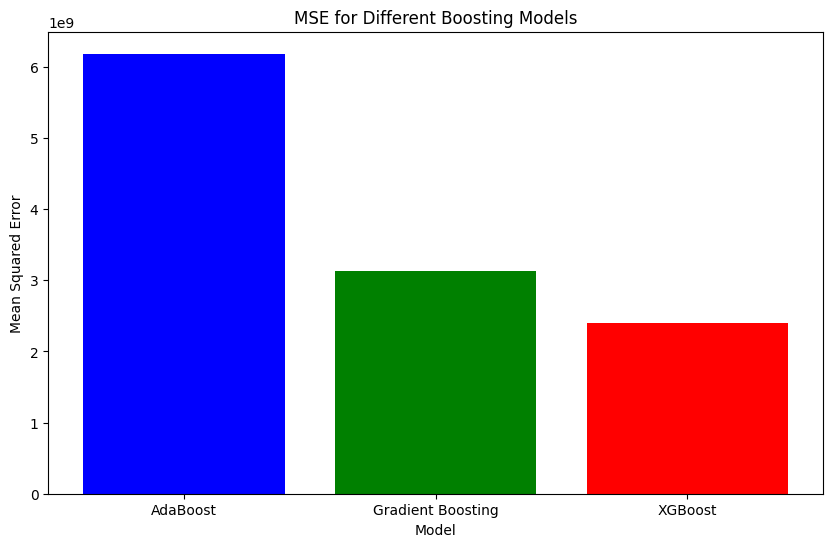

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

data = pd.get_dummies(data)

data.columns = data.columns.str.replace(r"[\[\]<>]", "", regex=True)

imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed.drop('median_house_value', axis=1)
y = data_imputed['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
ada_mse = mean_squared_error(y_test, ada_pred)
print("AdaBoost MSE:", ada_mse)

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
print("Gradient Boosting MSE:", gb_mse)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
print("XGBoost MSE:", xgb_mse)

models = ['AdaBoost', 'Gradient Boosting', 'XGBoost']
mse_values = [ada_mse, gb_mse, xgb_mse]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.title('MSE for Different Boosting Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1]
}

ada_model = AdaBoostRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

ada_grid = GridSearchCV(ada_model, param_grid=ada_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid = GridSearchCV(gb_model, param_grid=gb_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid = GridSearchCV(xgb_model, param_grid=xgb_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

ada_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)

print("Best parameters for AdaBoost:", ada_grid.best_params_)
print("Best parameters for Gradient Boosting:", gb_grid.best_params_)
print("Best parameters for XGBoost:", xgb_grid.best_params_)

ada_best_pred = ada_grid.predict(X_test)
gb_best_pred = gb_grid.predict(X_test)
xgb_best_pred = xgb_grid.predict(X_test)

ada_mse = mean_squared_error(y_test, ada_best_pred)
gb_mse = mean_squared_error(y_test, gb_best_pred)
xgb_mse = mean_squared_error(y_test, xgb_best_pred)

print("AdaBoost MSE:", ada_mse)
print("Gradient Boosting MSE:", gb_mse)
print("XGBoost MSE:", xgb_mse)


Best parameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 200}
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
AdaBoost MSE: 5604073656.35668
Gradient Boosting MSE: 2182753693.088342
XGBoost MSE: 2191674301.931574


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

if X_train.isnull().sum().sum() > 0 or X_test.isnull().sum().sum() > 0:
    raise ValueError("Unfortunately, there are still NaN values ​​in the data after imputation.")


ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'alpha': [0.01, 0.1, 0.5, 0.9] 
}

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'alpha': [0.01, 0.1, 0.5, 0.9], 
    'lambda': [0, 0.1, 0.5, 1]  
}

ada_model = AdaBoostRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

ada_grid = GridSearchCV(ada_model, param_grid=ada_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid = GridSearchCV(gb_model, param_grid=gb_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid = GridSearchCV(xgb_model, param_grid=xgb_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

ada_grid.fit(X_train, y_train)
gb_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)

print("Best parameters for AdaBoost:", ada_grid.best_params_)
print("Best parameters for Gradient Boosting:", gb_grid.best_params_)
print("Best parameters for XGBoost:", xgb_grid.best_params_)

ada_best_pred = ada_grid.predict(X_test)
gb_best_pred = gb_grid.predict(X_test)
xgb_best_pred = xgb_grid.predict(X_test)

ada_mse = mean_squared_error(y_test, ada_best_pred)
gb_mse = mean_squared_error(y_test, gb_best_pred)
xgb_mse = mean_squared_error(y_test, xgb_best_pred)

print("AdaBoost MSE (with regularization):", ada_mse)
print("Gradient Boosting MSE (with regularization):", gb_mse)
print("XGBoost MSE (with regularization):", xgb_mse)


Best parameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 200}
Best parameters for Gradient Boosting: {'alpha': 0.01, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best parameters for XGBoost: {'alpha': 0.1, 'lambda': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
AdaBoost MSE (with regularization): 5611335250.99556
Gradient Boosting MSE (with regularization): 2283628776.9477577
XGBoost MSE (with regularization): 2203830260.08246


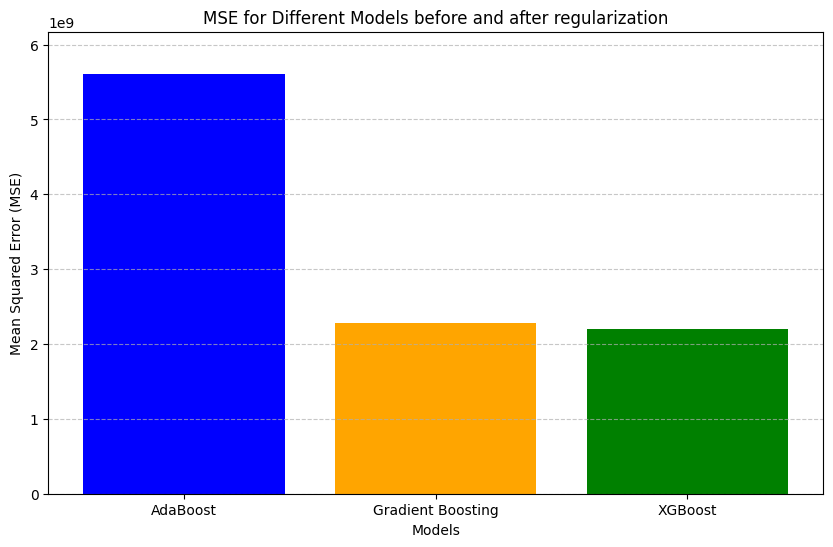

In [31]:
import matplotlib.pyplot as plt

models = ['AdaBoost', 'Gradient Boosting', 'XGBoost']
mse_values = [ada_mse, gb_mse, xgb_mse]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green'])
plt.title('MSE for Different Models before and after regularization')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim(0, max(mse_values) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
